In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

**LOADING THE DATASET**

In [ ]:
df = pd.read_csv('netflix1.csv')
print(df.head())

  show_id     type                             title         director  \
0      s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1      s3  TV Show                         Ganglands  Julien Leclercq   
2      s6  TV Show                     Midnight Mass    Mike Flanagan   
3     s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4      s8    Movie                           Sankofa     Haile Gerima   

         country date_added  release_year rating  duration  \
0  United States  9/25/2021          2020  PG-13    90 min   
1         France  9/24/2021          2021  TV-MA  1 Season   
2  United States  9/24/2021          2021  TV-MA  1 Season   
3         Brazil  9/22/2021          2021  TV-PG    91 min   
4  United States  9/24/2021          1993  TV-MA   125 min   

                                           listed_in  
0                                      Documentaries  
1  Crime TV Shows, International TV Shows, TV Act...  
2                 TV Dr

**DATA EXPLORATION**

In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


**DATA CLEANING**

Check for Nulls

In [ ]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
country,0
date_added,0
release_year,0
rating,0
duration,0
listed_in,0


Remove Duplicates

In [ ]:
df.drop_duplicates(subset='title', keep='first', inplace=True)

Create New Columns

In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')  # coerce handles bad/missing dates

df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

**EDA (Exploratory Data Analysis)**

1. Content Added by Year

/tmp/ipython-input-9-2571829383.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='year_added', palette='Set2')


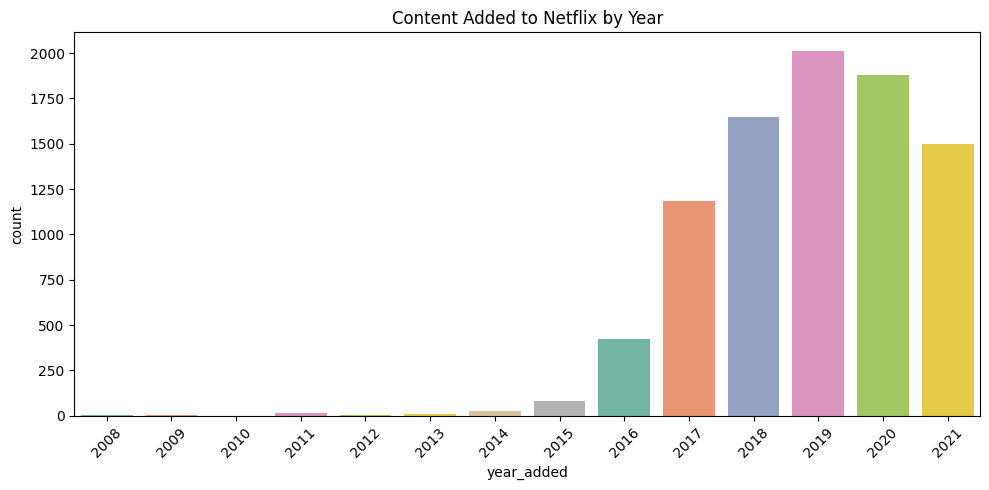

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='year_added', palette='Set2')
plt.title('Content Added to Netflix by Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

2. Movies vs TV Shows

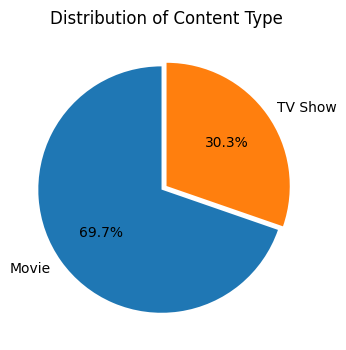

In [ ]:
plt.figure(figsize=(6,4))
df['type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, explode=[0.05, 0])
plt.title('Distribution of Content Type')
plt.ylabel('')
plt.show()

3. Top 10 Countries with Most Content

/tmp/ipython-input-11-2542773759.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='magma')


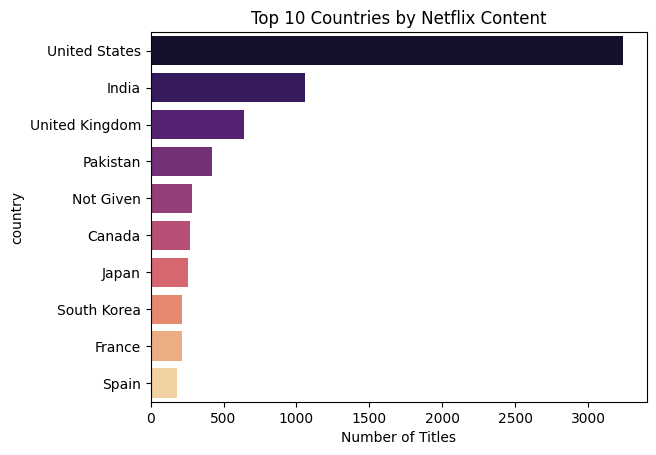

In [ ]:
top_countries = df['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='magma')
plt.title("Top 10 Countries by Netflix Content")
plt.xlabel("Number of Titles")
plt.show()